# This is a playground notebook

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from astropy.cosmology.units import redshift_distance
from astropy.cosmology import FlatLambdaCDM
import sys

ROOT_DIR = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(ROOT_DIR)
# import utils.utils as ut
from importlib import reload

In [3]:
def getPrefactor(modeled=False):
    if modeled:
        return 0.01
    else:
        return 0.04


def yearAdjustment(yr):
    return np.sqrt(10 / yr)


def photo_z_err(m, y, redshift):
    return (1 + redshift) * yearAdjustment(y) * getPrefactor(m)

In [4]:
key_yrs = [1, 4, 7, 10]
z_step = 0.001
z_range = np.arange(0, 1.5 + z_step, step=z_step)
modeled = [False, True]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
ls = ["-", "-."]

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:8: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_1582218/1315708722.py:8: SyntaxWarning: invalid escape sequence '\D'
  axs.set_ylabel("$\Delta z$")


(0.0, 1.5)

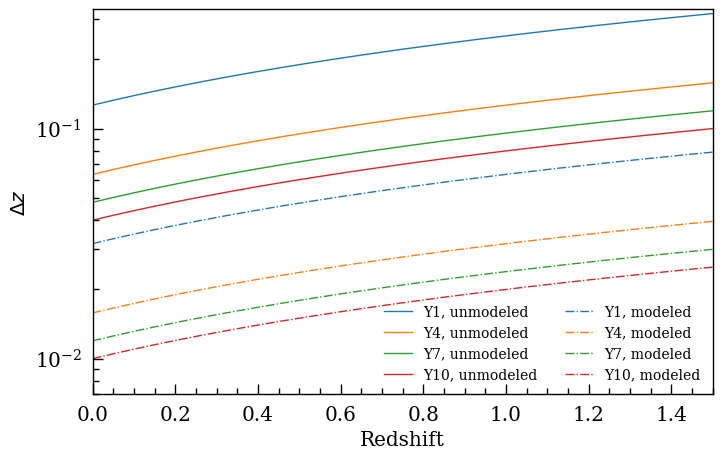

In [5]:
fig, axs = plt.subplots(1, sharex=True, sharey=True, figsize=[8, 5])
for m, l in zip(modeled, ls):
    for year, c in zip(key_yrs, colors):
        z_err = []
        for z in z_range:
            z_err.append(photo_z_err(m, year, z))
        axs.plot(
            z_range, z_err, l, label=f"Y{year}, {'modeled' if m else 'unmodeled'}", c=c
        )
    axs.set_ylabel("$\Delta z$")
axs.legend(ncols=2, fontsize="medium")
axs.set_xlabel("Redshift")
axs.set_ylim(0.007, 0.33)
axs.semilogy()
axs.set_xticks(np.arange(0, 1.5, step=0.2))
axs.set_xlim(0, 1.5)

## Now compute the fractional redshift uncertainty based on 

In [6]:
import GCR
import GCRCatalogs as GCRCat
import astropy.units as u
import astropy.cosmology.units as cu

cat_name = "skysim5000_v1.2_small"
skysimCat = GCRCat.load_catalog(cat_name)

In [7]:
target_classes = ["BGS", "LRG", "ELG", "QSO"]
redshift_ranges = [[0, 0.4], [0.2, 1], [0.6, 1.6], [0.6, 3.5]]
redshift_uncertainties = [10, 50, 9, 100]  # In km s^-1
z_step = 0.01

Text(0, 0.5, '$\\frac{\\Delta z}{z} [\\%]$')

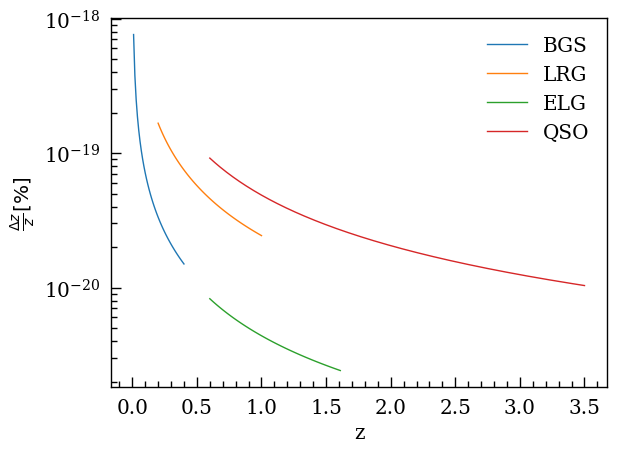

In [8]:
fig, ax = plt.subplots()
for t, z_range, z_unc in zip(target_classes, redshift_ranges, redshift_uncertainties):
    z_low = z_range[0]
    z_high = z_range[1]
    z_unc = z_unc * u.km
    z_arr = np.arange(z_low, z_high + z_step, step=z_step) * cu.redshift
    z_arr = z_arr[z_arr > 0 * cu.redshift]
    d = z_arr.to(u.km, cu.redshift_distance(skysimCat.cosmology, kind="luminosity"))
    ax.plot(z_arr, 100 * z_unc / d.value, label=t)
ax.legend()
ax.semilogy()
ax.set_xlabel("z")
ax.set_ylabel(r"$\frac{\Delta z}{z} [\%]$")

## Develop the 

In [ ]:
reload(ut)

In [ ]:
z_step = 0.001
z_arr = np.arange(0, 3 + z_step, step=z_step) * cu.redshift
fiducialCosmo = FlatLambdaCDM(
    name="SkySim Cosmology", **dict(skysimCat.cosmology.parameters)
)
d_L = fiducialCosmo.luminosity_distance(z_arr)

In [ ]:
cosmoDict = dict(skysimCat.cosmology.parameters)
h = 0.5
cosmoDict["H0"] = 100 * h * u.km / (u.Mpc * u.s)
alternateCosmo = FlatLambdaCDM(name="Alternate Cosmology", **cosmoDict)
new_zs1 = ut.transmute_redshift(z_arr, fiducialCosmo, alternate_h=0.5, zmin=-0.1)
new_zs2 = ut.transmute_redshift(z_arr, fiducialCosmo, alternate_h=1, zmin=-0.1)
# new_zs = alternateCosmo.
# d_L2 = alternateCosmo.luminosity_distance(z_arr)
# newLuminosityDistances = alternateCosmo.luminosity_distance(z_arr)

In [ ]:
fig, ax = plt.subplots()
ax.plot(z_arr, new_zs1, label=f"h=0.5")
ax.plot([0, 3], [0, 3], label="h=0.71")
ax.plot(z_arr, new_zs2, label=f"h=1")
ax.set_xlabel("Nominal redshift")
ax.set_ylabel("New cosmology redshift")
ax.legend()
fig.tight_layout()

In [11]:
skysimCat.sky_area

57.071968